# 特征雷达图

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#绘制一个简单的雷达图" data-toc-modified-id="绘制一个简单的雷达图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>绘制一个简单的雷达图</a></span></li><li><span><a href="#进一步绘制特征雷达图" data-toc-modified-id="进一步绘制特征雷达图-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>进一步绘制特征雷达图</a></span><ul class="toc-item"><li><span><a href="#准备数据" data-toc-modified-id="准备数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>准备数据</a></span></li></ul></li></ul></div>

## 绘制一个简单的雷达图

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''设置允许中文绘图'''
plt.rcParams['font.family'] = 'PingFang HK'

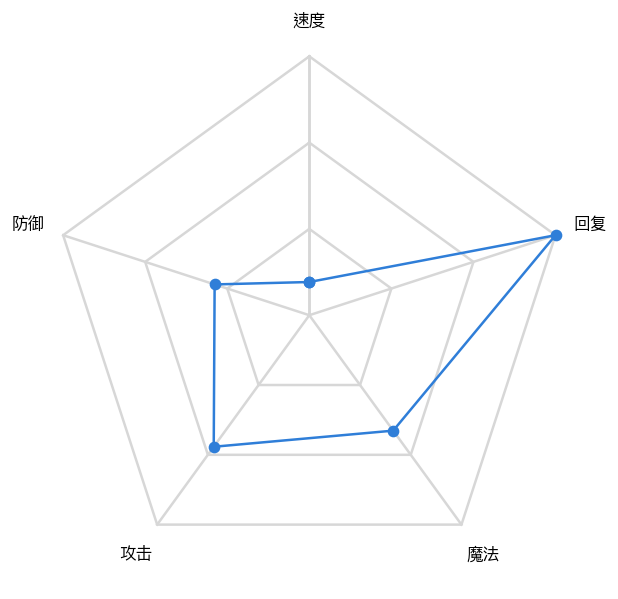

In [5]:
# 定义数据
values = [10, 30, 49, 43, 78]
# 定义标签
labels = ['速度', '防御', '攻击', '魔法', '回复']
# 定义颜色
line_color = np.array([215, 215, 215])/255
d_color = np.array([47, 126, 216])/255
n = len(values)
angles = np.concatenate((np.linspace(0, 2*np.pi, n, endpoint=False), [0]))

fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(111, polar=True)
_max = max(values)
for ang in angles:
    ax.plot([ang]*2, [0, _max], '-', c=line_color)
# -------绘制边界------- #
tick = 3
for i in range(tick):
    ax.plot(angles, [_max*(1/tick)*(i+1)]*(n+1), c = line_color)
# -------绘制数据------- #
ax.plot(angles, values+[values[0]], "-", c = d_color)
ax.plot(angles, values+[values[0]], "o", c = d_color)

ax.set_thetagrids(angles * 180 / np.pi, labels) # 设置显示的角度，将弧度转换为角度

ax.set_theta_zero_location('N')        # 设置极坐标的起点（即0°）在正北方向，即相当于坐标轴逆时针旋转90°
ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
ax.grid(False)                         # 不显示默认的分割线
ax.set_yticks([])                      # 不显示坐标间隔
plt.show()

## 进一步绘制特征雷达图

### 准备数据

In [9]:
df = pd.read_excel(r'../data/特征雷达数据集.xlsx', index_col=0)
# 取一行数据绘制
ser = df.iloc[0, :]
ser

SO2特征值      0.888610
NO2特征值      1.249855
PM10特征值     0.879310
CO特征值       0.968452
PM2.5特征值    1.441100
SO2上限值      1.197748
NO2上限值      1.168145
PM10上限值     1.281123
CO上限值       1.023587
PM2.5上限值    1.416803
SO2下限值      0.802252
NO2下限值      0.831855
PM10下限值     0.718877
CO下限值       0.976413
PM2.5下限值    0.583197
Name: 2020/03/11, dtype: float64

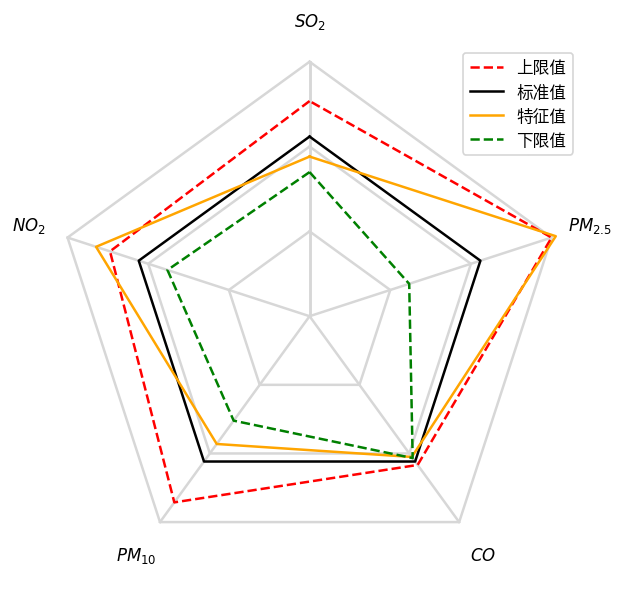

In [20]:
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(111, polar=True)
# 先绘制上限值
values = ser[5:10].to_list()   # 上限值
labels = ['$SO_2$', '$NO_2$', '$PM_{10}$', '$CO$', '$PM_{2.5}$']
# 定义颜色
line_color = np.array([215, 215, 215])/255
n = len(values)
angles = np.concatenate((np.linspace(0, 2*np.pi, n, endpoint=False), [0]))
_max = max(values)
for ang in angles:
    ax.plot([ang]*2, [0, _max], '-', c=line_color)
# -------绘制边界------- #
tick = 3
for i in range(tick):
    ax.plot(angles, [_max*(1/tick)*(i+1)]*(n+1), c = line_color)
# -------绘制数据------- #
ax.plot(angles, values+[values[0]], "--", c = 'r', label='上限值')
# 绘制标准值
values = [1] * 6
ax.plot(angles, values, '-', c='k', label='标准值')
# 绘制特征值
values = ser[:5].to_list()
ax.plot(angles, values+[values[0]], '-', c='orange', label='特征值')
# 绘制下限值
values = ser[10:].to_list()
ax.plot(angles, values+[values[0]], '--', c='green', label='下限值')

ax.set_thetagrids(angles * 180 / np.pi, labels) # 设置显示的角度，将弧度转换为角度

ax.set_theta_zero_location('N')        # 设置极坐标的起点（即0°）在正北方向，即相当于坐标轴逆时针旋转90°
ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
ax.grid(False)                         # 不显示默认的分割线
ax.set_yticks([])                      # 不显示坐标间隔
ax.legend()
plt.show()